In [5]:
# !pip install pandas

In [2]:
import pandas as pd
file_path = './ref/경상남도 김해시_경전철 역사별 시간대별 승하차 인원 정보_20241225.csv'
gimhea = pd.read_csv(file_path, encoding="EUC-KR")
gimhea.head() 

,분류,영업일자,역사명,합계,00시 인원,01시 인원,02시 인원,03시 인원,04시 인원,05시 인원,...,14시 인원,15시 인원,16시 인원,17시 인원,18시 인원,19시 인원,20시 인원,21시 인원,22시 인원,23시 인원
0,승차,2023-12-15,사상,8915,0,0,0,0,36,300,...,433,478,503,638,664,446,408,270,270,178
1,승차,2023-12-15,괘법 르네시떼,1446,0,0,0,0,9,55,...,71,55,81,99,135,65,53,32,23,14
2,승차,2023-12-15,서부산 유통지구,1587,0,0,0,0,1,8,...,82,76,155,498,362,70,33,17,7,3
3,승차,2023-12-15,공항,5731,0,0,0,0,0,4,...,346,354,438,583,404,355,379,419,258,56
4,승차,2023-12-15,덕두,1454,0,0,0,0,0,7,...,65,55,106,321,285,54,37,30,21,3


In [3]:
columns = ['num', 'name', 'type', 'total']
time_col = [f'{i}H' for i in range(0,23)]
columns = columns + time_col + ['00~23H']
gimhea.columns = columns
gimhea = gimhea.loc[:,:'total']
gimhea

,num,name,type,total
0,승차,2023-12-15,사상,8915
1,승차,2023-12-15,괘법 르네시떼,1446
2,승차,2023-12-15,서부산 유통지구,1587
3,승차,2023-12-15,공항,5731
4,승차,2023-12-15,덕두,1454
...,...,...,...,...
15829,하차,2024-12-25,수로왕릉,2576
15830,하차,2024-12-25,박물관,1577
15831,하차,2024-12-25,연지공원,1280
15832,하차,2024-12-25,장신대,2213


In [4]:
data = gimhea.groupby(['name', 'type']).sum().reset_index()
data

,name,type,num,total
0,2023-12-15,가야대,승차하차,6261
1,2023-12-15,공항,승차하차,10367
2,2023-12-15,괘법 르네시떼,승차하차,2877
3,2023-12-15,김해대학,승차하차,2328
4,2023-12-15,김해시청,승차하차,2561
...,...,...,...,...
7912,2024-12-25,연지공원,승차하차,2656
7913,2024-12-25,인제대,승차하차,3198
7914,2024-12-25,장신대,승차하차,4276
7915,2024-12-25,지내,승차하차,1800


In [5]:
gdata = data[['name', 'type', 'total']]
gdata = gdata.sort_values(by=['name', 'type'], ascending=[True, True])
gdata.head(10)

,name,type,total
0,2023-12-15,가야대,6261
1,2023-12-15,공항,10367
2,2023-12-15,괘법 르네시떼,2877
3,2023-12-15,김해대학,2328
4,2023-12-15,김해시청,2561
5,2023-12-15,대사,1050
6,2023-12-15,대저,14154
7,2023-12-15,덕두,2769
8,2023-12-15,등구,504
9,2023-12-15,박물관,3991


In [6]:
mdata = gdata.groupby(by="type").sum().reset_index()
tdata = mdata[['type', 'total']]
tdata

,type,total
0,가야대,1765036
1,공항,3958348
2,괘법 르네시떼,1100102
3,김해대학,692133
4,김해시청,803089
5,대사,350135
6,대저,4808842
7,덕두,868479
8,등구,173083
9,박물관,1199556


In [7]:
sdata = tdata.sort_values(by='total', ascending=False)
sdata.head(10)
total_data = sdata[:]
total_data

,type,total
13,사상,6787810
6,대저,4808842
1,공항,3958348
11,부원,2014881
15,수로왕릉,1868677
0,가야대,1765036
10,봉황,1575396
18,장신대,1546508
17,인제대,1487799
9,박물관,1199556


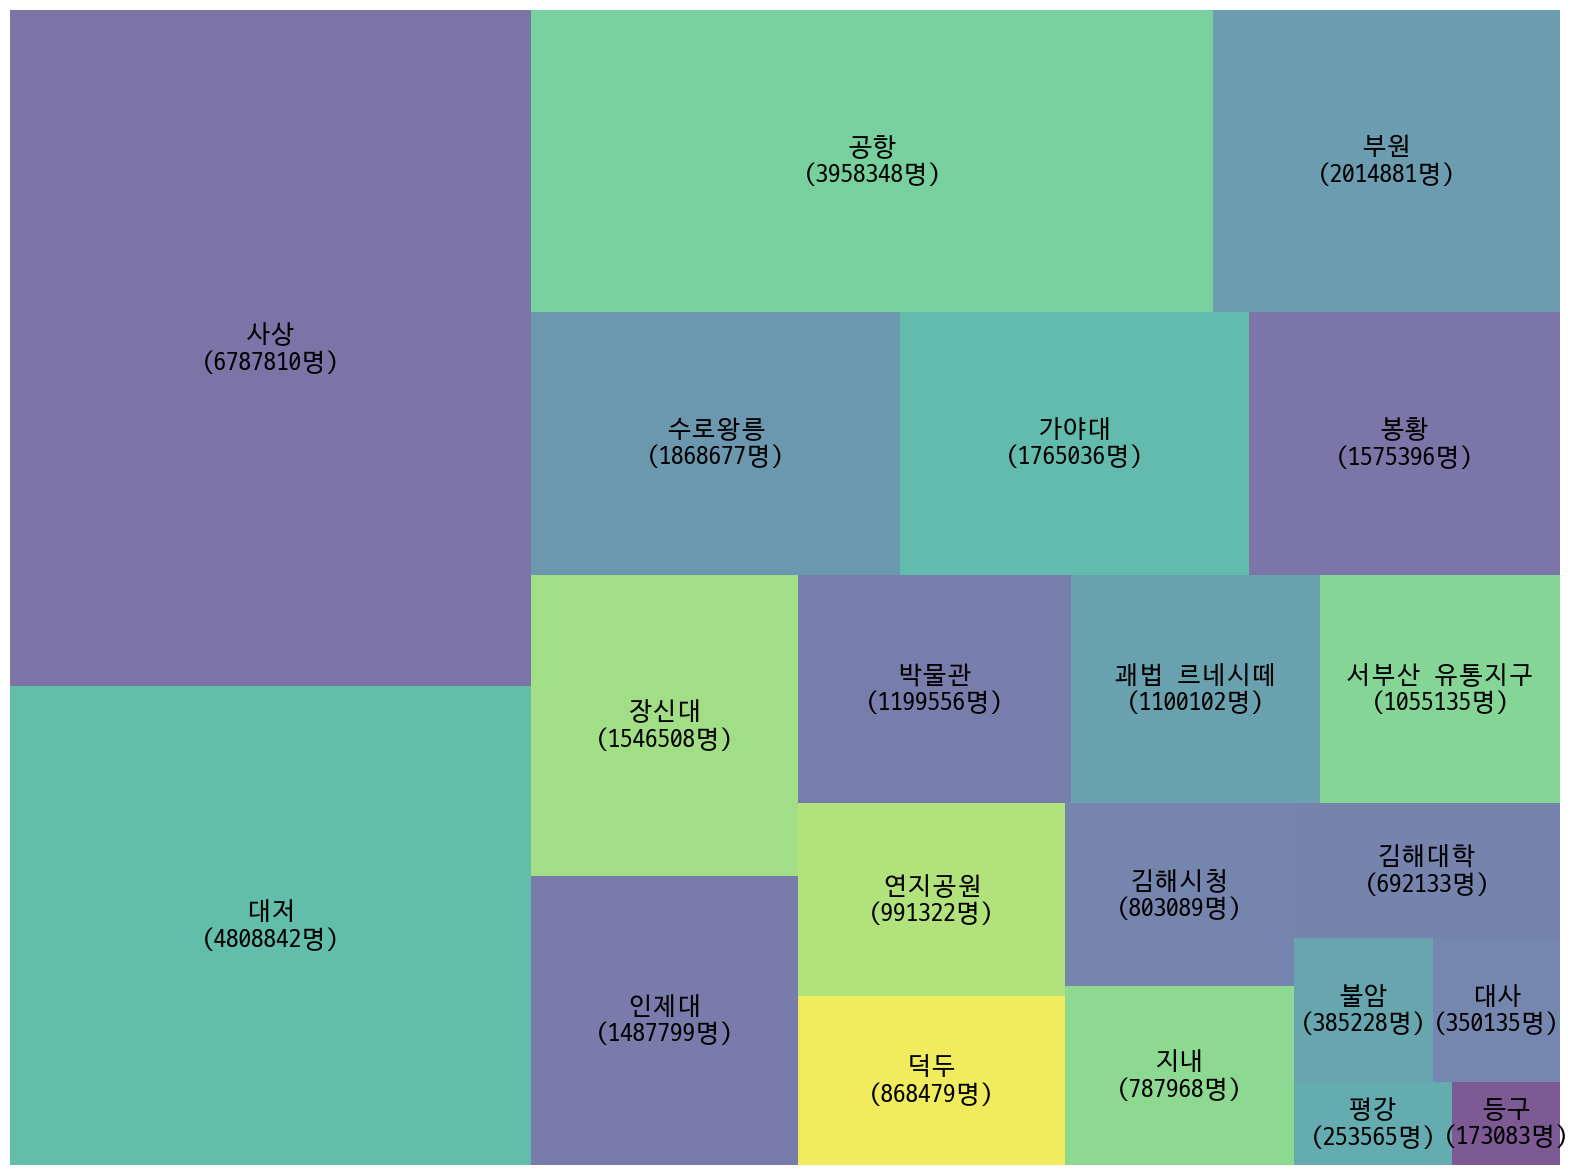

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import squarify

d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"

plt.figure(figsize=(20,15))
# squarify.plot(sizes = total_data['total'], label = total_data["type"], alpha = 0.7)
squarify.plot(sizes = total_data['total'], label = [f"{x[0]}\n({x[1]}명)" for x in zip(total_data['type'],total_data['total'])], alpha = 0.7)
plt.rcParams['font.size'] = 18
plt.gca().invert_yaxis()
plt.axis("off")
plt.show()